In [2]:
import numpy as np
from pulp import *
import matplotlib.pyplot as plt

In [42]:
prob = LpProblem("Název_problému", LpMaximize)

prob.to_dict()

{'objective': {'name': None,
  'coefficients': [{'name': '__dummy', 'value': 1}]},
 'constraints': [],
 'variables': [{'lowBound': 0,
   'upBound': 0,
   'cat': 'Continuous',
   'varValue': None,
   'dj': None,
   'name': '__dummy'}],
 'parameters': {'name': 'Název_problému',
  'sense': -1,
  'status': 0,
  'sol_status': 0},
 'sos1': [],
 'sos2': []}

In [40]:
prob = LpProblem("Vyroba", LpMaximize)

c1 = 5
c2 = 10

x1 = LpVariable("x1", 0, None, LpContinuous)
x2 = LpVariable("x2", 0, None, LpContinuous)

z = LpAffineExpression([(x1, c1), (x2, c2)])

prob += z

const1 = LpConstraint(e=2 * x1 + 2 * x2, sense=LpConstraintLE, rhs=40)
const2 = LpConstraint(e=x1 + 3 * x2, sense=LpConstraintLE, rhs=30)
const3 = LpConstraint(e=x1 + x2, sense=LpConstraintGE, rhs=20)

prob += const1
prob += const2
prob += const3

prob.solve(PULP_CBC_CMD(msg=0))

print("Status:", LpStatus[prob.status])
print("x1:", x1.varValue)
print("x2:", x2.varValue)
print("Cena:", value(prob.objective))


prob.variables()

Status: Optimal
x1: 15.0
x2: 5.0
Cena: 125.0


[x1, x2]

In [44]:
c = np.array([600, 400])
A = np.array([[2, 0.25], [4, 2], [3, 1], [1, 4]])
b = np.array([45, 100, 300, 50])

prob = LpProblem("problem", LpMaximize)
x = LpVariable.dicts("x", range(2), lowBound=0, cat="Continuous")
prob += lpSum([c[i] * x[i] for i in range(2)])
for i in range(len(A)):
    prob += lpSum([A[i][j] * x[j] for j in range(2)]) <= b[i]

prob.solve(PULP_CBC_CMD(msg=0))

print("Status:", LpStatus[prob.status])
print("Objective value:", value(prob.objective))
print("Solution:")
for v in prob.variables():
    print(v.name, "=", v.varValue)

print("Dual variables:")
for name, c in prob.constraints.items():
    print(name, "=", c.pi)

Status: Optimal
Objective value: 15714.285440000001
Solution:
x_0 = 21.428571
x_1 = 7.1428571
Dual variables:
_C1 = -0.0
_C2 = 142.85714
_C3 = -0.0
_C4 = 28.571429


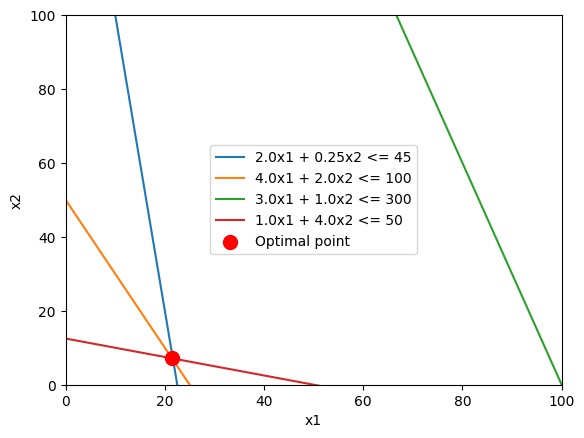

In [4]:
# graph


x = np.linspace(0, 100, 100)

for i in range(4):
    y = (b[i] - A[i][0] * x) / A[i][1]
    plt.plot(x, y, label=f"{A[i][0]}x1 + {A[i][1]}x2 <= {b[i]}")

opt = [prob.variables()[0].varValue, prob.variables()[1].varValue]


plt.xlim((0, 100))
plt.ylim((0, 100))
plt.xlabel("x1")
plt.ylabel("x2")
plt.scatter(
    [prob.variables()[0].varValue],
    [prob.variables()[1].varValue],
    color="red",
    label="Optimal point",
    s=100, # size
    zorder=10, # on top
)
plt.legend()
plt.show()